# Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understand the Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Exploring Key Features

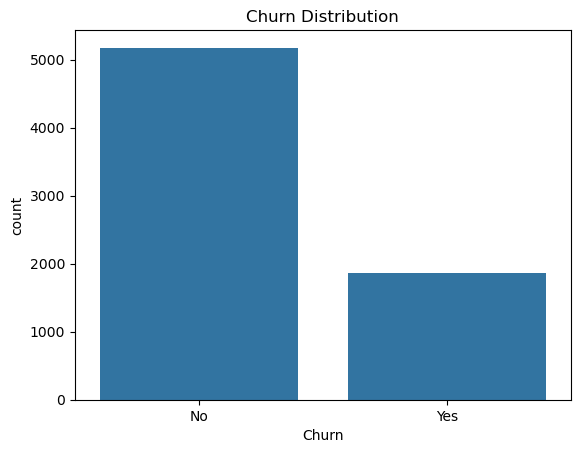

In [12]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

### Gender analysis EDA section

Gender count by gender gender
Male      3555
Female    3488
Name: count, dtype: int64
Gender presentage:  gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Churn Rate by Gender:
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


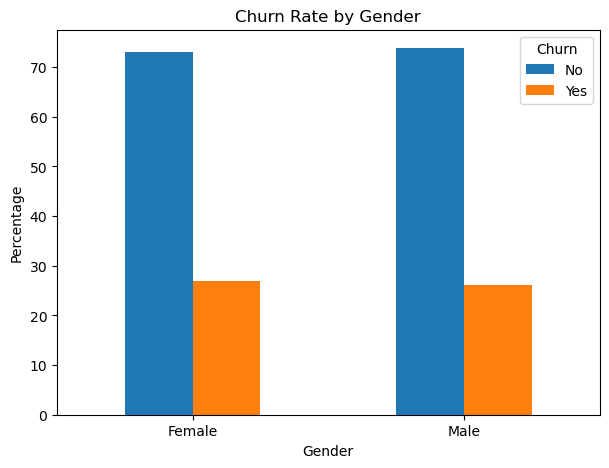

In [ ]:
# Count distribution
gender_count = data['gender'].value_counts()

# Percentage distribution
gender_percent = data['gender'].value_counts(normalize=True) * 100

print("Gender count by gender",gender_count)
print("Gender presentage:",gender_percent)

# Calculate churn rate by gender
print("\nChurn Rate by Gender:")
gender_churn = data.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
print(gender_churn)


# Visualize the churn rate by gender
gender_churn.plot(kind='bar', figsize=(7,5))
plt.title('Churn Rate by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()



### SeniorCitizen analysis EDA section

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


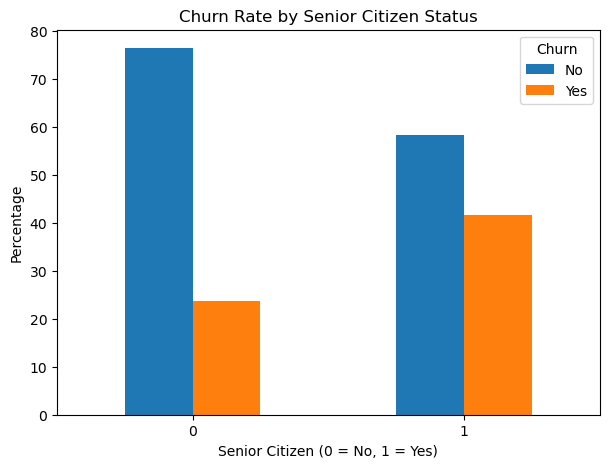

In [47]:
# Count distribution
senior_count = data['SeniorCitizen'].value_counts()

# Percentage distribution
senior_percent = data['SeniorCitizen'].value_counts(normalize=True) * 100

display(senior_count)
display(senior_percent)

# Calculate churn rate by SeniorCitizen
senior_churn = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
display(senior_churn)   

# Visualize the churn rate by SeniorCitizen
senior_churn.plot(kind='bar', figsize=(7,5))
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()



### Partner feature EDA section

In [ ]:
# Count distribution
partner_count = data['Partner'].value_counts()

# Percentage distribution
partner_percent = data['Partner'].value_counts(normalize=True) * 100

display(partner_count)
display(partner_percent)




Partner
No     3641
Yes    3402
Name: count, dtype: int64

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64